# Análise do Mercado de Livros:
#### Vitória Emanuele de Sousa Silva 
##### vitoriaemanueledesousa@gmail.com

In [1]:
import pandas as pd
import numpy as py

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [3]:
import datetime
from collections import Counter

In [4]:
df = pd.read_excel('.\Amazon_top100books_2009to2021.xlsx')
df

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,21401.0,4.8,Will Smith,Hardcover,2021,Non Fiction
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,79872.0,4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,1288,8.95,98.0,Dragons Love Tacos,15753.0,4.8,Adam Rubin,Hardcover,2021,Fiction
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,7246.0,4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


https://www.kaggle.com/datasets/abdulhamidadavize/top-100-best-selling-books-on-amazon-20092021

A Amazon é conhecida como a melhor livraria do mundo, onde você pode comprar todos os tipos de livros em diferentes formatos, incluindo capa dura, brochura, e-books e Kindle. 
Esses dados contêm os livros mais vendidos na Amazon de 2009 a 20 e s foram retirados do site da Amazon e cada ano contém 100 livros mais vendidos. 

Importante comentar que o dataframe não esta em '.csv', mas sim em '.xlsx' um formato especifico do excel, para manipular esse tipo de formato você deve ter a biblioteca 'openpyxl', muito útil para trabalhar com arquivos do excel, para ler o arquivo você usa o comando 'pd.read_excel()'

### Pré-Processamento:

O conjunto de dados já passou pela etapa de pré-processamento.

### Visualização:

Vamos analisar as colunas disponíveis e quais dados podemos '' para gerar insight:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


In [6]:
df.describe()

,Unnamed: 0,price,ranks,no_of_reviews,ratings,year
count,1291.000000,1287.000000,1287.000000,1287.000000,1287.000000,1291.000000
mean,645.000000,13.757117,50.246309,25827.712510,4.650894,2015.027111
std,372.823908,10.046391,28.803308,32224.059482,0.197174,3.734404
min,0.000000,1.170000,1.000000,50.000000,3.400000,2009.000000
25%,322.500000,8.550000,25.000000,6769.000000,4.600000,2012.000000
50%,645.000000,12.100000,50.000000,16845.000000,4.700000,2015.000000
75%,967.500000,16.290000,75.000000,32326.000000,4.800000,2018.000000
max,1290.000000,144.000000,100.000000,344811.000000,4.900000,2021.000000


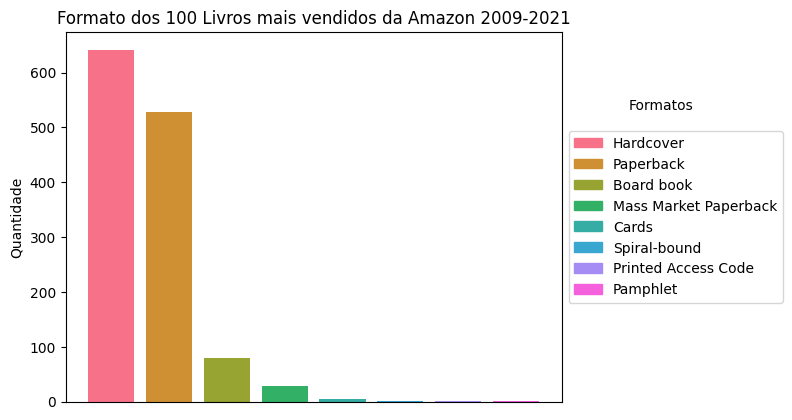

In [38]:
# Contagem dos formatos
format_counts = df['cover_type'].value_counts()
# Criar uma paleta de cores baseada nos valores de format_counts
palette = sns.color_palette("husl", len(format_counts))
# Criar o gráfico de barras com a paleta de cores
fig, ax = plt.subplots()
bars = ax.bar(format_counts.index, format_counts.values, color=palette)
# Adicionar legenda das cores e formatos
legend_patches = [mpatches.Patch(color=color, label=format_) for color, format_ in zip(palette, format_counts.index)]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
ax.text(1.2, 0.8, 'Formatos', transform=ax.transAxes, ha='center', va='center')
# Configurar o título e rótulos
ax.set_title('Formato dos 100 Livros mais vendidos da Amazon 2009-2021')
ax.set_ylabel('Quantidade')
# Remover nomes do eixo x
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

Optei por esse grafico, pois fica visualmente mais atraente, um grafico normal com os rotulos no eixo x por ter nomes muito grandes precisava de uma rotação de 90 graus que torna visualemente feio de vê e chato de ler. Podemos mudar também a paleta de cores para ficar mais atraente.

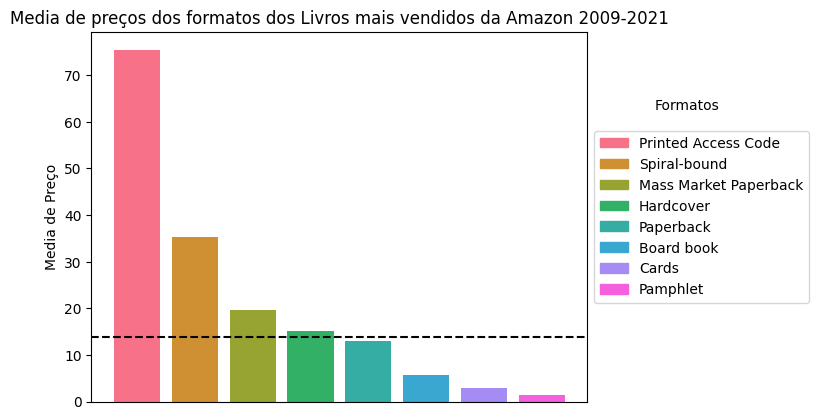

In [42]:
import matplotlib.patches as mpatches
# Média do preço de todos os livros
overall_mean_price = df['price'].mean()
# Media dos preços de cada formato em ordem crescente
mean_price_format = df.groupby('cover_type')['price'].mean().sort_values(ascending=False)
# Criar uma paleta de cores baseada nos valores da mean_price_format
palette = sns.color_palette("husl", len(mean_price_format))
# Criar o gráfico de barras com a paleta de cores
fig, ax = plt.subplots()
# Criando a linha com a media do preço de todos os livros 
ax.axhline(y=overall_mean_price, color='black', linestyle='--', label=f'Média Geral: {overall_mean_price:.2f}')
ax.legend(loc='upper left')
bars = ax.bar(mean_price_format.index, mean_price_format.values, color=palette)
# Adicionar legenda das cores e formatos
legend_patches = [mpatches.Patch(color=color, label=format_) for color, format_ in zip(palette, mean_price_format.index)]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
ax.text(1.2, 0.8, 'Formatos', transform=ax.transAxes, ha='center', va='center')
# Configurar o título e rótulos
ax.set_title('Media de preços dos formatos dos Livros mais vendidos da Amazon 2009-2021')
ax.set_ylabel('Media de Preço')
# Remover nomes do eixo x
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

Esse outro gráfico tem a média de preço de cada formato de livros e essa linha preta que corta o grafico seria a media de preço de todos os livros.

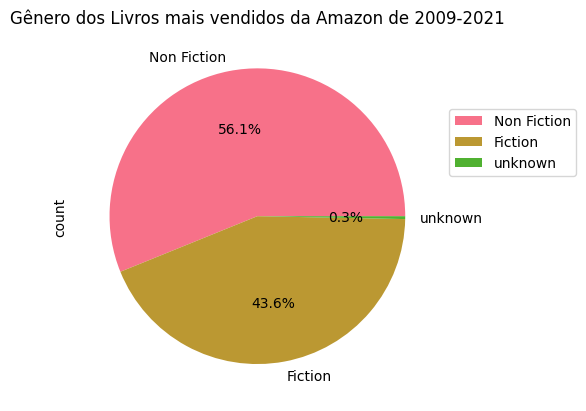

In [116]:
# Definir a paleta 'husl'
palette = sns.color_palette("husl")
# Contagem dos gêneros
genre = df['genre'].value_counts()
# Criar o gráfico de pizza com a paleta de cores 'husl'
fig, ax = plt.subplots()
genre.plot.pie(legend=True, autopct="%1.1f%%", colors=palette, ax=ax)
ax.set_title('Gênero dos Livros mais vendidos da Amazon de 2009-2021')
# Adicionar
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
plt.show()

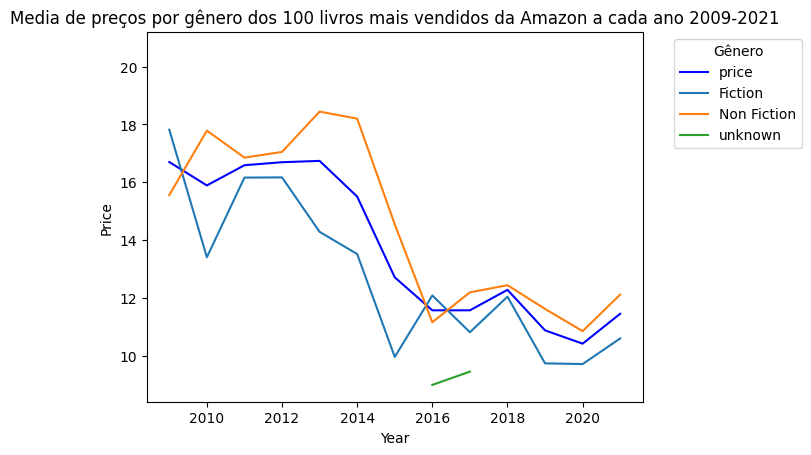

In [118]:
# Media de preços dos livros por ano
mean_price_year = df.groupby('year')['price'].mean()
mean_price_year.plot(kind='line', color = 'blue')
# Media de preço dos livros por genero
mean_price_genre_year = df.groupby(['year', 'genre'])['price'].mean().reset_index()
# Plotar as médias de preços por gênero e ano
for genre in mean_price_genre_year['genre'].unique():
    genre_mean_prices = mean_price_genre_year[mean_price_genre_year['genre'] == genre]
    plt.plot(genre_mean_prices['year'], genre_mean_prices['price'], label=genre)
plt.title('Media de preços por gênero dos 100 livros mais vendidos da Amazon a cada ano 2009-2021')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

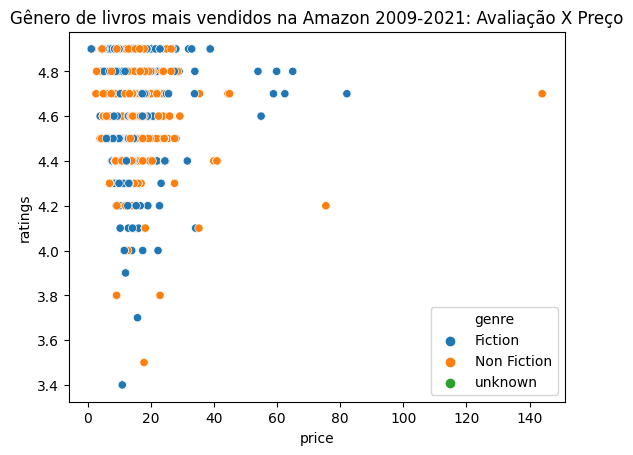

In [146]:
sns.scatterplot(x=df['price'], y=df['ratings'], hue = df['genre'])
plt.title('Gênero de livros mais vendidos na Amazon 2009-2021: Avaliação X Preço')
pyplot.show()

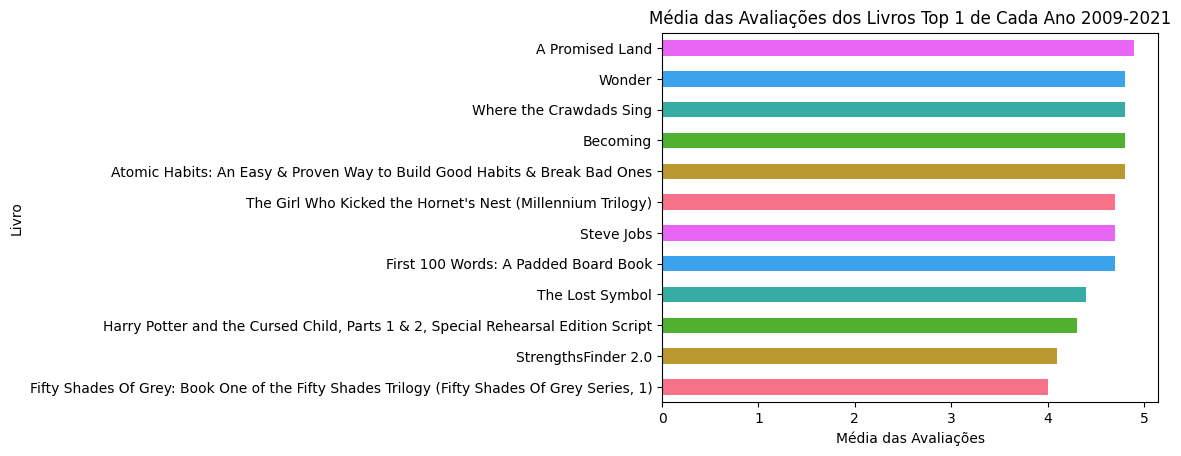

In [122]:
# Filtrar os livros que ficaram em primeiro lugar no top 100 de cada ano
top1_books = df[df['ranks'] == 1]
# Calcular a média das avaliações para cada livro ao longo dos anos
mean_ratings = top1_books.groupby('title')['ratings'].mean()
# Criar o gráfico de barras
mean_ratings.sort_values().plot(kind='barh', color= sns.color_palette("husl"))
plt.title('Média das Avaliações dos Livros Top 1 de Cada Ano 2009-2021')
plt.xlabel('Média das Avaliações')
plt.ylabel('Livro')
plt.show()

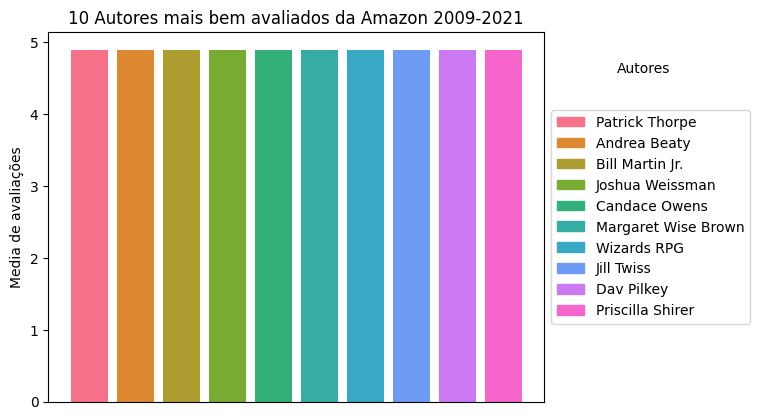

In [143]:
import matplotlib.patches as mpatches
# Calcular a média das avaliações para cada autor
mean_ratings_by_author = df.groupby('author')['ratings'].mean().sort_values(ascending=False)
# 10 autores mais bem avaliados
top_authors = mean_ratings_by_author.head(10)
# Criar uma paleta de cores baseada nos valores da media de avaliações
palette = sns.color_palette("husl", len(top_authors))
# Criar o gráfico de barras com a paleta de cores
fig, ax = plt.subplots()
bars = ax.bar(top_authors.index, top_authors.values, color=palette)
# Adicionar legenda das cores e formatos
legend_patches = [mpatches.Patch(color=color, label=author_) for color, author_ in zip(palette, top_authors.index)]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
ax.text(1.2, 0.9, 'Autores', transform=ax.transAxes, ha='center', va='center')
# Configurar o título e rótulos
ax.set_title('10 Autores mais bem avaliados da Amazon 2009-2021')
ax.set_ylabel('Media de avaliações')
# Remover nomes do eixo x
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

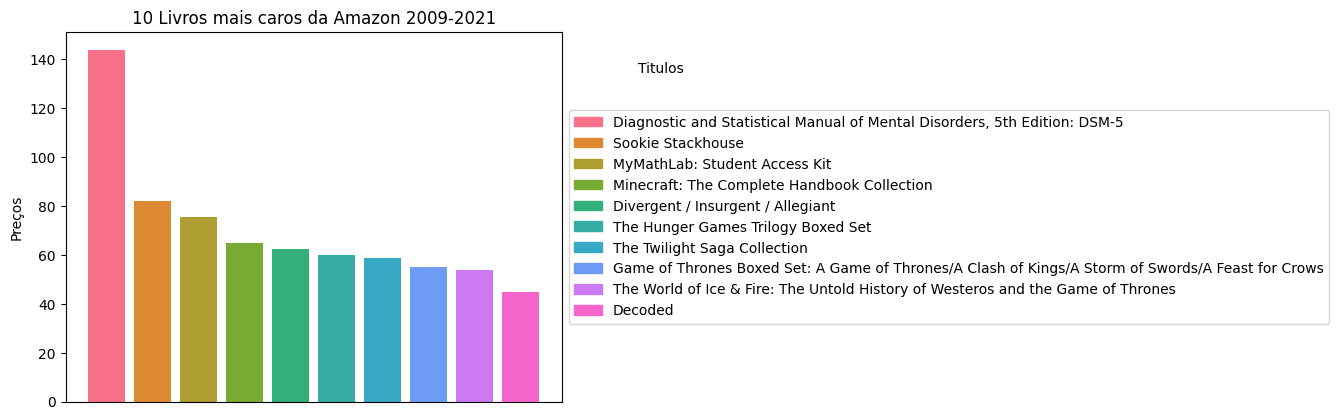

In [142]:
# Filtrar os livros mais caros
top10_expensive_books = df.groupby('title')['price'].max().nlargest(10).sort_values(ascending=False)
# Criar uma paleta de cores baseada nos preços
palette = sns.color_palette("husl", len(top10_expensive_books))
# Criar o gráfico de barras com a paleta de cores
fig, ax = plt.subplots()
bars = ax.bar(top10_expensive_books.index, top10_expensive_books.values, color=palette)
# Adicionar legenda das cores e titulos
legend_patches = [mpatches.Patch(color=color, label=title_) for color, title_ in zip(palette, top10_expensive_books.index)]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
ax.text(1.2, 0.9, 'Titulos', transform=ax.transAxes, ha='center', va='center')
# Configurar o título e rótulos
ax.set_title('10 Livros mais caros da Amazon 2009-2021')
ax.set_ylabel('Preços')
# Remover nomes do eixo x
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()


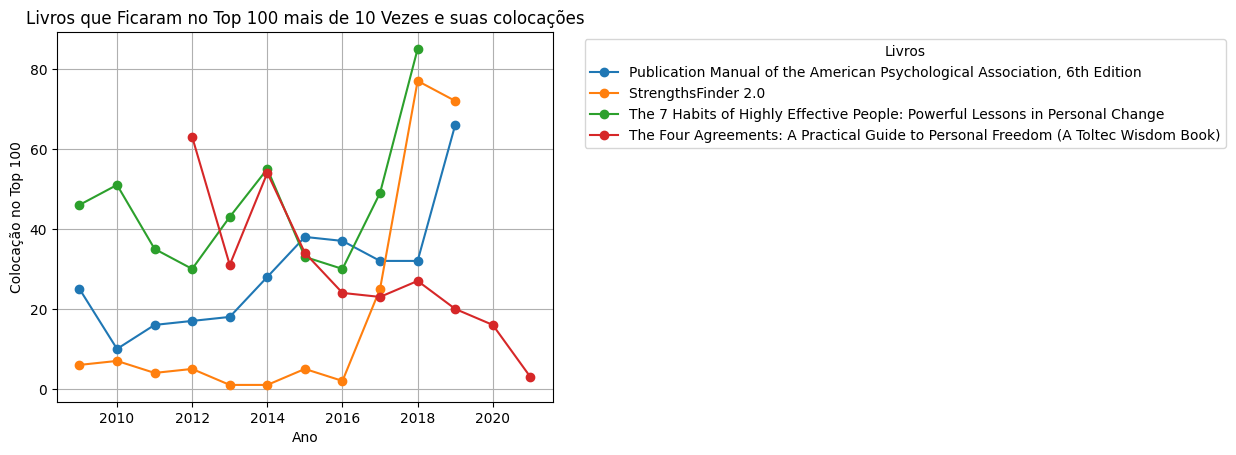

In [147]:
# Calcular a frequência de cada livro no top 100 ao longo dos anos
book_frequency = df.groupby('title')['year'].count()
# Filtrar os livros que apareceram de 10 a mais vezes no top 100
popular_books = book_frequency[(book_frequency >= 10)]
# Obter os anos e as colocações dos livros no top 100
book_data = df[df['title'].isin(popular_books.index)]
book_data = book_data.groupby(['title', 'year'])['ranks'].mean().unstack()
# Criar o gráfico de linhas
for title, ranks in book_data.iterrows():
    plt.plot(ranks.index, ranks.values, marker='o', linestyle='-', label=title)

plt.title('Livros que Ficaram no Top 100 mais de 10 Vezes e suas colocações')
plt.xlabel('Ano')
plt.ylabel('Colocação no Top 100')
plt.legend(title='Livros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


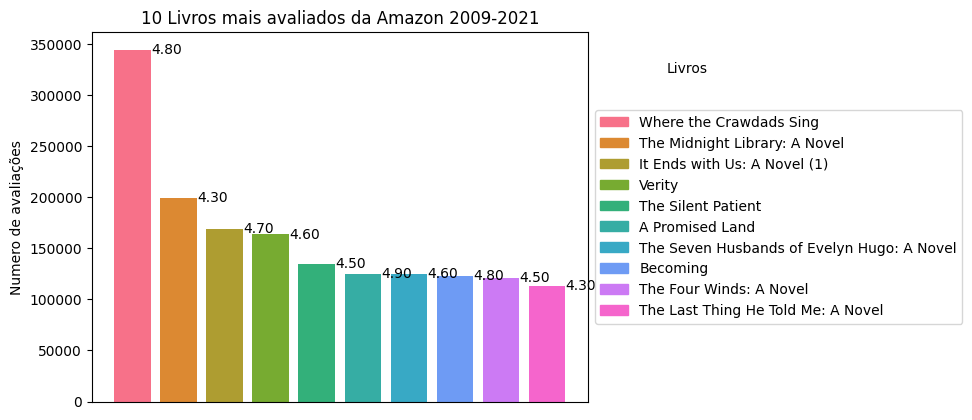

In [156]:
import matplotlib.patches as mpatches
# Filtrar os livros mais avaliados
top10 = df.groupby('title')['no_of_reviews'].max().nlargest(10).sort_values(ascending=False)
# Criar uma paleta de cores baseada no numero de avaliações
palette = sns.color_palette("husl", len(top10))
# Criar o gráfico de barras com a paleta de cores
fig, ax = plt.subplots()
bars = ax.bar(top10.index, top10.values, color=palette)
# Adicionar legenda das cores com os titulos dos livros
legend_patches = [mpatches.Patch(color=color, label=title_) for color, title_ in zip(palette, top10.index)]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))
ax.text(1.2, 0.9, 'Livros', transform=ax.transAxes, ha='center', va='center')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width(), bar.get_height(), f'{df[df["title"] == top10.index[i]]["ratings"].values[0]:.2f}', ha='left', va='center')

# Configurar o título e rótulos
ax.set_title('10 Livros mais avaliados da Amazon 2009-2021')
ax.set_ylabel('Numero de avaliações')
# Remover nomes do eixo x
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

09/02/2024: Terminei de fazer o Gráficos e o próximo passo é fazer uma análise do que pode ser visualizado.